# Support Vector Machine


## Import and Export

We suppress the warnings, so that the outputs of our models are reduced to the relevant parts and the notebook does not get unneccessarily long.

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Importing data

In [ ]:
# Imports 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

import os
import sys

sys.path.append(os.path.abspath("../../scripts"))
from data_loader import DataLoader

In [3]:
data_loader = DataLoader()
X_train, y_train = data_loader.training_data
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

In [4]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
# (data == value_to_count) creates a boolean Series where True corresponds to occurrences of the specific value.
# .sum() counts the True values (since True is equivalent to 1 in Python).
print(f"Number of negative samples in training set: {(y_train == 0.0).sum()}")
print(f"Number of positive samples in training set: {(y_train == 1.0).sum()}")

X_train shape: (177576, 21)
y_train shape: (177576,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)
Number of negative samples in training set: 149592
Number of positive samples in training set: 27984


### Exporting models

In [ ]:
import joblib
from datetime import datetime

# Save model to pkl file for later reuse
def save_model (model, model_name):
    # Get the current timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Save the best model to a file with a timestamp
    model_filename = f'../../models/support_vector_machine/svm_model_{model_name}_{timestamp}.pkl'
    joblib.dump(model, model_filename)

    print(f"Initial model saved to '{model_filename}'")

## Initial exploration

Here, we try out the Support Vector Machine to get an initial feeling how it performs and to have something to improve upon in the following sections using Resampling, Hyperparameter Tuning, and PCA.

Thus, we use the default hyperparameters of the SVC (Support Vector Classifier) by scikit learn. Those are: 

- C=1.0
- kernel='rbf'
- degree=3
- gamma='scale'
- coef0=0.0
- shrinking=True
- probability=False
- tol=1e-3
- chacke_size=200
- class_weight=None
- verbose=False
- max_iter=-1
- decision_function_shape='ovr'
- break_ties=False
- random_state=None

Source: https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html 

In [35]:
# Initialize the support vector machine model
model_initial = SVC()  # use default choices for a Support Vector Classifier

# Train the model on the preprocessed training data
model_initial.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model_initial.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy}")
print("Classification Report:\n", report)

Validation Accuracy: 0.8423961352657005
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     21797
         1.0       0.00      0.00      0.00      4078

    accuracy                           0.84     25875
   macro avg       0.42      0.50      0.46     25875
weighted avg       0.71      0.84      0.77     25875



This is basically the exact same result as for the majority classifier. So, we used almost an whole hour (58 minutes on Salome's computer) and lots of energy for training to get the exact same result as with the majority classifier, that had almost zero training time. According to Occam's razor, we would never pick this SVM model!

For future evaluation, we save this model. Of course, we hope that we do not have to reuse it because we want to improve on it in the following cells. But better safe than sorry. 

In [36]:
save_model(model_initial, "default-hyperparameters")

Initial model saved to '../models/support_vector_machine/svm_model_default-hyperparameters_20241129_164730.pkl'


## Resampling Methods

### Random Undersampling

In [5]:
# test random undersampling
X_train_undersampling_random, y_train_undersampling_random = data_loader.training_data_undersampling_random
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train_undersampling_random shape: {X_train_undersampling_random.shape}")
print(f"y_train_undersampling_random shape: {y_train_undersampling_random.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# (data == value_to_count) creates a boolean Series where True corresponds to occurrences of the specific value.
# .sum() counts the True values (since True is equivalent to 1 in Python).
print(f"Number of negative samples in undersampled training set: {(y_train_undersampling_random == 0.0).sum()}")
print(f"Number of positive samples in undersampled training set: {(y_train_undersampling_random == 1.0).sum()}")

X_train_undersampling_random shape: (55968, 21)
y_train_undersampling_random shape: (55968,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)
Number of negative samples in undersampled training set: 27984
Number of positive samples in undersampled training set: 27984


After the undersampling, we have as many positive as negative examples in our training data. This more balanced training set might be useful to improve the recall on the positive class, i.e., diabetes (previously, the minority class).

By random undersampling, we reduced the original training dataset containing 177567 examples to 55968 examples, which is approximately a third of the original. 

In [ ]:
# Initialize the support vector machine model
model_undersampling = SVC(C=1.0, kernel='rbf', verbose=True)

# Train the model on the preprocessed training data
model_undersampling.fit(X_train_undersampling_random, y_train_undersampling_random)

# Make predictions on the validation set
y_val_pred_undersampling = model_undersampling.predict(X_val)

[LibSVM]

In [ ]:
# Evaluate the model's performance
accuracy_undersampling = accuracy_score(y_val, y_val_pred_undersampling)
report_undersampling = classification_report(y_val, y_val_pred_undersampling)

print(f"Validation Accuracy: {accuracy_undersampling}")
print("Classification Report:\n", report_undersampling)

print(f"Number of support vectors for each class: {model_undersampling.n_support_}")

Validation Accuracy: 0.6922125603864734
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.67      0.79     21797
         1.0       0.32      0.81      0.45      4078

    accuracy                           0.69     25875
   macro avg       0.63      0.74      0.62     25875
weighted avg       0.85      0.69      0.73     25875

[16269 16310]


The reduction of data points to a third drastically improves the runtime from over 40 minutes to 3 minutes (in our setting). This makes sense since the training time of a Support Vector Machine generally has a cubic runtime O(n^3), i.e., it grows cubically with the number n of training examples (source: https://stackoverflow.com/questions/18165213/how-much-time-does-it-take-to-train-a-svm-classifier).

SVM on undersampled data yields a better recall for the positive class than SVM on the full training data. But as expected for higher recall, but the overall accuracy suffers.

In [ ]:
save_model(model_undersampling, "undersampling")

Initial model saved to '../models/support_vector_machine/svm_model_undersampling_20241125_105832.pkl'


Paper for theory why Undersampling is so good for SVMs: https://www.sciencedirect.com/science/article/pii/S1474667016429952

### Random Oversampling

Testing random oversampling for SVMs would make training time even longer. For comparison, the original training dataset has 177567 samples and our undersampled dataset 63964 samples (i.e., approximately a third of the original). Our oversampled dataset (the random version and also the SMOTE version) has 299184 samples. Thus, is not performed for SVMs here.

### SMOTE Oversampling

Testing SMOTE oversampling for SVMs would make training time even longer. For comparison, the original training dataset has 177567 samples and our undersampled dataset 63964 samples (i.e., approximately a third of the original). Our oversampled dataset (the random version and also the SMOTE version) has 299184 samples. Thus, is not performed for SVMs here.

### SMOTE Tomek

In [12]:
X_train_oversampling_smote_tomek, y_train_oversampling_smote_tomek = data_loader.training_data_resampling_smote_tomek
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train_oversampling_smote shape: {X_train_oversampling_smote_tomek.shape}")
print(f"y_train_oversampling_smote shape: {y_train_oversampling_smote_tomek.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Number of negative samples in SMOTE Tomek training set: {(y_train_oversampling_smote_tomek == 0.0).sum()}")
print(f"Number of positive samples in SMOTE Tomek training set: {(y_train_oversampling_smote_tomek == 1.0).sum()}")

X_train_oversampling_smote shape: (298548, 21)
y_train_oversampling_smote shape: (298548,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)
Number of negative samples in SMOTE Tomek training set: 149274
Number of positive samples in SMOTE Tomek training set: 149274


After the SMOTE Tomek sampling, we have as many positive as negative examples in our training data, as after the Random Undersampling. Here again, we hope that this more balanced training set might be useful to improve the recall on the positive class (i.e., diabetes) (previously, the minority class) compared with the original dataset. 

By SMOTE Tomek sampling, we increased the original training dataset containing 177567 examples to 298548 examples, which is roughly 1.5 times the size of the original dataset. 

### Conclusion

All of these considered resampling methods have potential for the SVM classifier, especially the undersampling. Therefore, all of them will be options in the resampling in the pipeline that is tuned in the next step. In particular, the Halving Grid Search will try out different extents of undersampling.

Due to the training complexity of SVMs, they can only be fit efficiently using Halving Grid Search, which is done in the next step.

## Dimensionality Reduction with PCA

In [ ]:
import pandas as pd

# Load the PCA datasets
train_pca = pd.read_csv("../../data/pca/dataset_train_pca.csv")
val_pca = pd.read_csv("../../data/pca/dataset_val_pca.csv")
test_pca = pd.read_csv("../../data/pca/dataset_test_pca.csv")

In [ ]:
# Split the PCA datasets into features and target
X_train_pca = train_pca.drop(columns=["Diabetes"])
y_train_pca = train_pca["Diabetes"]

X_val_pca = val_pca.drop(columns=["Diabetes"])
y_val_pca = val_pca["Diabetes"]

X_test_pca = test_pca.drop(columns=["Diabetes"])
y_test_pca = test_pca["Diabetes"]

In [ ]:
# Initialize the classifier
model_pca = SVC(C=100, kernel='linear')  

# Train the model on the preprocessed training data
model_pca.fit(X_train_pca, y_train_pca)

# Make predictions on the validation set
y_val_pred = model_pca.predict(X_val_pca)

# Calculate the accuracy
accuracy = accuracy_score(y_val_pca, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print(classification_report(y_val_pca, y_val_pred))


PCA on all components has an infeasible time complexity for Support Vector Machines (at least for Salome's computer without a GPU). It needs more than 12 hours and was automatically cut off.

Using only the best n components for classification:

In [ ]:
num_components = 2  # 5, ...
X_train_best_components = X_train_pca.iloc[:, :num_components]
X_val_best_components = X_val_pca.iloc[:, :num_components]

# Initialize the classifier
model_pca_n = SVC(C=100, kernel='linear', verbose=True)  

# Train the classifier
model_pca_n.fit(X_train_best_components, y_train_pca)

# Make predictions on the validation set
y_val_pred = model_pca_n.predict(X_val_best_components)

# Calculate the accuracy
accuracy = accuracy_score(y_val_pca, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print(classification_report(y_val_pca, y_val_pred))

This would have been the next step, but since PCA took such an infeasibly long time for all components, we have not further investigated PCA for SCMs on our dataset.

## Hyperparameter Tuning

We tune the following hyperparameters: the type of kernel (e.g., linear, rbf, polynomial, sigmoid), the regularization parameter (C), and kernel-specific parameters like gamma for the RBF kernel and the degree for polynomial kernels.

The best model of randomized search yields a worse accuracy than the best model of grid search. Also the f1-score is worse. Thus, it seems to make sense to go with the model identified by grid search.

### Halving Grid Search

Due to time complexity, hyperparameter tuning is only feasible with the halving grid search. Especially, Random Search and typical Grid Search was tried as well and needed too much time to be reasonable for this project.

In [14]:
# Hyperparameter tuning with Halving Grid Search
from sklearn.experimental import enable_halving_search_cv
from imblearn.pipeline import Pipeline
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, CondensedNearestNeighbour
from imblearn.combine import SMOTETomek

pipeline = Pipeline([
    ('resampler', None),  # Placeholder for resampling method
    ('classifier', SVC(max_iter=10000, random_state=42, probability=True))  # Model
])

param_grid = [
    {
        'classifier__kernel': ['linear'],  # Kernel type
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'classifier__tol': [1e-3, 1e-2, 1e-1],  # Tolerance for stopping criteria 
        'resampler': [None,  # original, imbalanced dataset
                      RandomUnderSampler(random_state=42), 
                      RandomUnderSampler(random_state=42, sampling_strategy=0.5), # sampling_strategy = number of minoority class instances / number of majority class instances
                      RandomUnderSampler(random_state=42, sampling_strategy=0.25), 
                      RandomOverSampler(random_state=42), 
                      SMOTE(random_state=42), 
                      SMOTETomek(random_state=42)] 
    }, 
    {
        'classifier__kernel': ['poly'],  # Kernel type
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'classifier__degree': [2, 3, 4, 5], # Degree of the polynomial kernel function (only for ‘poly’)
        'classifier__gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient (only for ‘rbf’, ‘poly’ and ‘sigmoid’)
        'classifier__coef0': [-1.0, 0.0, 1.0],  # Independent term in kernel function (only for ‘poly’ and ‘sigmoid’)
        'classifier__tol': [1e-3, 1e-2, 1e-1],  # Tolerance for stopping criteria  
        'resampler': [None,  # original, imbalanced dataset
                      RandomUnderSampler(random_state=42), 
                      RandomUnderSampler(random_state=42, sampling_strategy=0.5), # sampling_strategy = number of minoority class instances / number of majority class instances
                      RandomUnderSampler(random_state=42, sampling_strategy=0.25), 
                      RandomOverSampler(random_state=42), 
                      SMOTE(random_state=42), 
                      SMOTETomek(random_state=42)] 
    }, 
    {
        'classifier__kernel': ['rbf'],  # Kernel type
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'classifier__gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient  # Kernel coefficient (only for ‘rbf’, ‘poly’ and ‘sigmoid’)
        'classifier__tol': [1e-3, 1e-2, 1e-1],  # Tolerance for stopping criteria 
        'resampler': [None,  # original, imbalanced dataset
                      RandomUnderSampler(random_state=42), 
                      RandomUnderSampler(random_state=42, sampling_strategy=0.5), # sampling_strategy = number of minoority class instances / number of majority class instances
                      RandomUnderSampler(random_state=42, sampling_strategy=0.25), 
                      RandomOverSampler(random_state=42), 
                      SMOTE(random_state=42), 
                      SMOTETomek(random_state=42)] 
    },
    {
        'classifier__kernel': ['sigmoid'],  # Kernel type
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'classifier__gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient (only for ‘rbf’, ‘poly’ and ‘sigmoid’)
        'classifier__coef0': [-1.0, 0.0, 1.0],  # Independent term in kernel function (only for ‘poly’ and ‘sigmoid’)
        'classifier__tol': [1e-3, 1e-2, 1e-1],  # Tolerance for stopping criteria 
        'resampler': [None,  # original, imbalanced dataset
                      RandomUnderSampler(random_state=42), 
                      RandomUnderSampler(random_state=42, sampling_strategy=0.5), # sampling_strategy = number of minoority class instances / number of majority class instances
                      RandomUnderSampler(random_state=42, sampling_strategy=0.25), 
                      RandomOverSampler(random_state=42), 
                      SMOTE(random_state=42), 
                      SMOTETomek(random_state=42)] 
    }
]

### Recall as objective

In [ ]:
# Set up HalvingGridSearchCV
halving_grid_search_r = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,  # Parameter grid remains the same  
    cv=5,  # 5-fold cross-validation
    scoring='recall',  # we want to optimize recall  
    n_jobs=-1,  # Use all processors
    verbose=1  # To track progress
)

# Fit the random search on training data
halving_grid_search_r.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters (Recall):", halving_grid_search_r.best_params_)
print("Best Cross-Validation (Recall):", halving_grid_search_r.best_score_)

n_iterations: 9
n_required_iterations: 9
n_possible_iterations: 9
min_resources_: 27
max_resources_: 177576
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 12222
n_resources: 27
Fitting 5 folds for each of 12222 candidates, totalling 61110 fits
----------
iter: 1
n_candidates: 4074
n_resources: 81
Fitting 5 folds for each of 4074 candidates, totalling 20370 fits
----------
iter: 2
n_candidates: 1358
n_resources: 243
Fitting 5 folds for each of 1358 candidates, totalling 6790 fits
----------
iter: 3
n_candidates: 453
n_resources: 729
Fitting 5 folds for each of 453 candidates, totalling 2265 fits
----------
iter: 4
n_candidates: 151
n_resources: 2187
Fitting 5 folds for each of 151 candidates, totalling 755 fits
----------
iter: 5
n_candidates: 51
n_resources: 6561
Fitting 5 folds for each of 51 candidates, totalling 255 fits
----------
iter: 6
n_candidates: 17
n_resources: 19683
Fitting 5 folds for each of 17 candidates, totalling 85 fits
----------
iter: 7
n_c

In [16]:
report_halving_GS = classification_report(y_val, halving_grid_search_r.predict(X_val))
print("Classification Report:\n", report_halving_GS)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     21797
         1.0       0.16      1.00      0.27      4078

    accuracy                           0.16     25875
   macro avg       0.08      0.50      0.14     25875
weighted avg       0.02      0.16      0.04     25875



In [17]:
best_model_r = halving_grid_search_r.best_estimator_
save_model(best_model_r, "best-recall")

Initial model saved to '../models/support_vector_machine/svm_model_best-recall_20241129_074200.pkl'


### F1 as objective

Let's try with scoring='f1' and see whether the results are more balanced.

In [ ]:
# Set up HalvingGridSearchCV
halving_grid_search_f1 = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,  # Parameter grid remains the same  
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # we want to optimize recall  
    n_jobs=-1,  # Use all processors
    verbose=1  # To track progress
)

# Fit the random search on training data
halving_grid_search_f1.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters (F1-Score):", halving_grid_search_f1.best_params_)
print("Best Cross-Validation (F1-Score):", halving_grid_search_f1.best_score_)

n_iterations: 9
n_required_iterations: 9
n_possible_iterations: 9
min_resources_: 27
max_resources_: 177576
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 12222
n_resources: 27
Fitting 5 folds for each of 12222 candidates, totalling 61110 fits
----------
iter: 1
n_candidates: 4074
n_resources: 81
Fitting 5 folds for each of 4074 candidates, totalling 20370 fits
----------
iter: 2
n_candidates: 1358
n_resources: 243
Fitting 5 folds for each of 1358 candidates, totalling 6790 fits
----------
iter: 3
n_candidates: 453
n_resources: 729
Fitting 5 folds for each of 453 candidates, totalling 2265 fits
----------
iter: 4
n_candidates: 151
n_resources: 2187
Fitting 5 folds for each of 151 candidates, totalling 755 fits
----------
iter: 5
n_candidates: 51
n_resources: 6561
Fitting 5 folds for each of 51 candidates, totalling 255 fits
----------
iter: 6
n_candidates: 17
n_resources: 19683
Fitting 5 folds for each of 17 candidates, totalling 85 fits
----------
iter: 7
n_c

In [19]:
report_halving_GS = classification_report(y_val, halving_grid_search_f1.predict(X_val))
print("Classification Report:\n", report_halving_GS)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.45      0.60     21797
         1.0       0.19      0.68      0.29      4078

    accuracy                           0.49     25875
   macro avg       0.53      0.56      0.44     25875
weighted avg       0.77      0.49      0.55     25875



In [20]:
best_model_f1 = halving_grid_search_f1.best_estimator_
save_model(best_model_f1, "best-f1")

Initial model saved to '../models/support_vector_machine/svm_model_best-f1_20241129_100911.pkl'


### Accuracy as objective

Let's try with scoring='accuracy' and see whether the results are better.

In [ ]:
# Set up HalvingGridSearchCV
halving_grid_search_acc = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,  # Parameter grid remains the same  
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # we want to optimize recall
    n_jobs=-1,  # Use all processors
    verbose=1  # To track progress
)

# Fit the random search on training data
halving_grid_search_acc.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters (Accuracy):", halving_grid_search_acc.best_params_)
print("Best Cross-Validation (Accuracy):", halving_grid_search_acc.best_score_)

n_iterations: 9
n_required_iterations: 9
n_possible_iterations: 9
min_resources_: 27
max_resources_: 177576
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 12222
n_resources: 27
Fitting 5 folds for each of 12222 candidates, totalling 61110 fits
----------
iter: 1
n_candidates: 4074
n_resources: 81
Fitting 5 folds for each of 4074 candidates, totalling 20370 fits
----------
iter: 2
n_candidates: 1358
n_resources: 243
Fitting 5 folds for each of 1358 candidates, totalling 6790 fits
----------
iter: 3
n_candidates: 453
n_resources: 729
Fitting 5 folds for each of 453 candidates, totalling 2265 fits
----------
iter: 4
n_candidates: 151
n_resources: 2187
Fitting 5 folds for each of 151 candidates, totalling 755 fits
----------
iter: 5
n_candidates: 51
n_resources: 6561
Fitting 5 folds for each of 51 candidates, totalling 255 fits
----------
iter: 6
n_candidates: 17
n_resources: 19683
Fitting 5 folds for each of 17 candidates, totalling 85 fits
----------
iter: 7
n_c

In [22]:
report_halving_GS = classification_report(y_val, halving_grid_search_acc.predict(X_val))
print("Classification Report:\n", report_halving_GS)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.12      0.21     21797
         1.0       0.17      0.97      0.29      4078

    accuracy                           0.25     25875
   macro avg       0.56      0.54      0.25     25875
weighted avg       0.83      0.25      0.22     25875



In [23]:
best_model_acc = halving_grid_search_acc.best_estimator_
save_model(best_model_acc, "best-accuracy")

Initial model saved to '../models/support_vector_machine/svm_model_best-accuracy_20241129_134911.pkl'


## Important features

We train a (simplistic) (underfitting) linear Support Vector Machine to find out which features it considers to be the most important. This feature importance is only possible for a linear SVC, i.e., a SVC with a linear kernel.

In [6]:
# Hyperparameter tuning with Halving Grid Search
from sklearn.experimental import enable_halving_search_cv
from imblearn.pipeline import Pipeline
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, CondensedNearestNeighbour
from imblearn.combine import SMOTETomek

pipeline = Pipeline([
    ('resampler', None),  # Placeholder for resampling method
    ('classifier', SVC(max_iter=10000, random_state=42, probability=True))  # Model
])

param_grid = [
    {
        'classifier__kernel': ['linear'],  # Kernel type
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'classifier__tol': [1e-3, 1e-2, 1e-1],  # Tolerance for stopping criteria 
        'resampler': [None,  # original, imbalanced dataset
                      RandomUnderSampler(random_state=42), 
                      RandomUnderSampler(random_state=42, sampling_strategy=0.5), # sampling_strategy = number of minoority class instances / number of majority class instances
                      RandomUnderSampler(random_state=42, sampling_strategy=0.25), 
                      RandomOverSampler(random_state=42), 
                      SMOTE(random_state=42), 
                      SMOTETomek(random_state=42)] 
    }
]

In [ ]:
# Set up HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,  # Parameter grid remains the same  
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # we want to optimize recall 
    n_jobs=-1,  # Use all processors
    verbose=1  # To track progress
)

# Fit the random search on training data
halving_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters (Recall):", halving_grid_search.best_params_)
print("Best Cross-Validation (Recall):", halving_grid_search.best_score_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 2192
max_resources_: 177576
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 126
n_resources: 2192
Fitting 5 folds for each of 126 candidates, totalling 630 fits
----------
iter: 1
n_candidates: 42
n_resources: 6576
Fitting 5 folds for each of 42 candidates, totalling 210 fits
----------
iter: 2
n_candidates: 14
n_resources: 19728
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 3
n_candidates: 5
n_resources: 59184
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 2
n_resources: 177552
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters (Recall): {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'classifier__tol': 0.001, 'resampler': RandomUnderSampler(random_state=42, sampling_strategy=0.5)}
Best Cross-Validation (Recall): 0.23675906376136774


In [ ]:
report_halving_GS = classification_report(y_val, halving_grid_search.predict(X_val))
print("Classification Report:\n", report_halving_GS)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.36      0.50     21797
         1.0       0.13      0.52      0.21      4078

    accuracy                           0.38     25875
   macro avg       0.47      0.44      0.35     25875
weighted avg       0.70      0.38      0.45     25875



In [8]:
from matplotlib import pyplot as plt
from sklearn import svm

def feature_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


In [ ]:
# best learnt linear model
model_linear = halving_grid_search.best_estimator_[1]  # 

# get cooefficients of features
features_coef = model_linear.coef_[0]

# get names of features
features_names = X_test.keys()

# put coefficients and names in a dictionary
features_dict = {features_names[i]: features_coef[i] for i in range(len(features_names))}

# sort decreasingly w.r.t. coefficients
features_dict = {k: v for k, v in sorted(features_dict.items(), key=lambda item: item[1])}

print('Weight for each feature (sorted increasingly):')
for key, value in features_dict.items():
    print((key, value))


Weight for each feature (sorted increasingly):
('MentHlth', -0.16256027393129102)
('BMI', -0.10624134530598894)
('Stroke', -0.10000000000000142)
('HvyAlcoholConsump', -0.09999999999999787)
('HeartDiseaseorAttack', -0.09999999999999432)
('NoDocbcCost', -0.09999999999999432)
('Income', -0.09999999998444764)
('PhysHlth', -0.07954284133569445)
('Age', -0.031206726721393352)
('GenHlth', -0.012482690667411589)
('Smoker', -0.006241345325577186)
('DiffWalk', -2.842170943040401e-14)
('HighChol', 0.0)
('Education', 3.728928277269006e-11)
('Veggies', 0.006241345325520342)
('Sex', 0.006241345325577186)
('HighBP', 0.0937586546745024)
('PhysActivity', 0.10000000000002274)
('Fruits', 0.10000000000002274)
('AnyHealthcare', 0.10000000000002274)
('CholCheck', 0.3000000000000682)


The features with highest absolute weights (>> 0.1) are 'MentHlth', 'BMI', 'CholCheck'.

## Comparison

Let's compare the 4 different SVM models: not tuned, tuned on recall, tuned on F1-score, tuned on accuracy.

### Metrics

For each of the trained SVM classifiers, we computed the performance metrics accuracy, precision, recall and f1-score on both classes. All values are computed on our validation set that was not part of the input to the cross validation.

|  | No Tuning (Default Hyperparameters) | Tuned on Recall | Tuned on F1-Score | Tuned on Accuracy |
|----------|----------|----------|----------|----------|
| Accuracy       | 0.84     | 0.16     | 0.49     | 0.25     |
| Precision 0    | 0.84     | 0     | 0.88     | 0.96     |
| Precision 1    | 0     | 0.16     | 0.19     | 0.17     |
| Recall 0       | 1     | 0     | 0.45     | 0.12     | 
| Recall 1       | 0     | 1     | 0.68     | 0.97     |
| F1 Score 0     | 0.91     | 0     | 0.60     | 0.21     |
| F1 Score 1     | 0     | 0.27     | 0.29     | 0.29     |


**No Tuning**: We observe the exact same result as for Majority Class baseline. This is terrible! So much training for nothing!

**Tuning on Recall**: This classifier is very good for recall on positive class, but terrible for negative class. Appearently, it just classifies each instance as the positive class (i.e., diabetes). Basically, it is doing what the Majority baseline does, but just for the Minority, i.e., a Minority dummy classifier. So, this classifier tuned on Recall is no option.

**Tuning on F1-Score**: This classifier gives best accuracy of all SVM classifiers trained here. Its recall is slightly better on the positive class than on the negative class (what we want) although both recalls not very high (around 0.5). Its precision is much better for the negative class than for the positive one. Consequently, its f1 score is better for the negative class than for the positive class.

**Tuning on Accuracy**: Interestingly, this classifier reports worse accuracy than when we tuned for high f1-score (this could be due to some randomness in halving grid search). The tendency in the metrics is the same as for tuning on f1-score, if one compares precision between both classes (and also recall between both classes). But the differences in the scores are much more extreme. The f1 score on the positive class is the same as when tuned on f1, but the f1 score is much worse on the negative class.

Consequently, we pick the model tuned on f1-score, since it has the best accuracies and f1-scores. Sadly, it has not the best recall on the positive class, but the other SCM classifiers have their high recall on the positive class only due to huge drawbacks in the positive class.

### Curves

For a visual comparison, we plot all of the 3 tuned models as precision-recall (PR) curves and as receiver-operating characteristic (ROC) curves, which are two very common visualizations.

In [ ]:
# Load the previously stored models
model_files = [
    '../../models/support_vector_machine/svm_model_best-recall_20241129_074200.pkl',
    '../../models/support_vector_machine/svm_model_best-f1_20241129_100911.pkl',
    '../../models/support_vector_machine/svm_model_best-accuracy_20241129_134911.pkl',
]

models = [joblib.load(file) for file in model_files]
model_names = ['Recall Tuned', 'F1-Score Tuned', 'Accuracy Tuned']

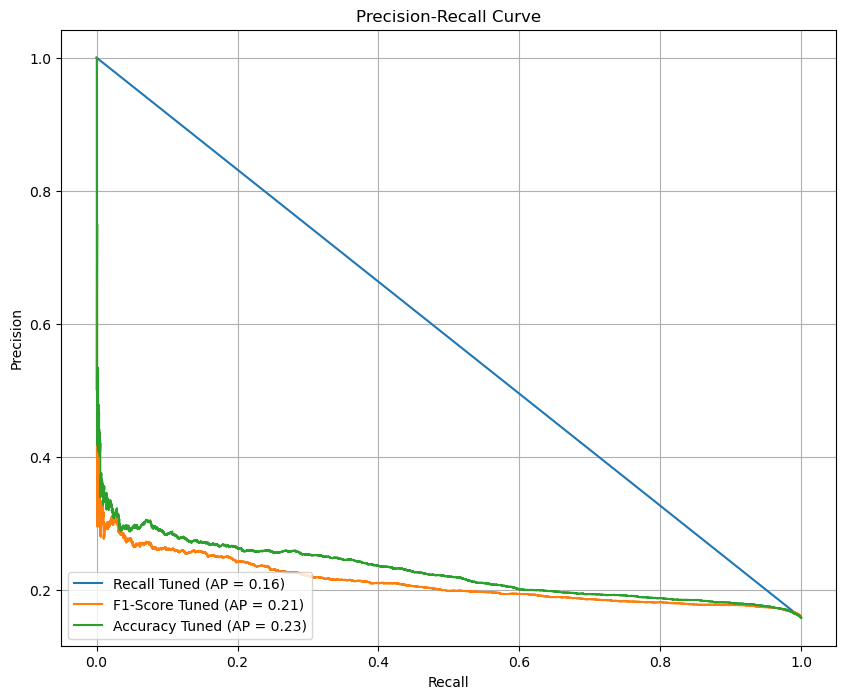

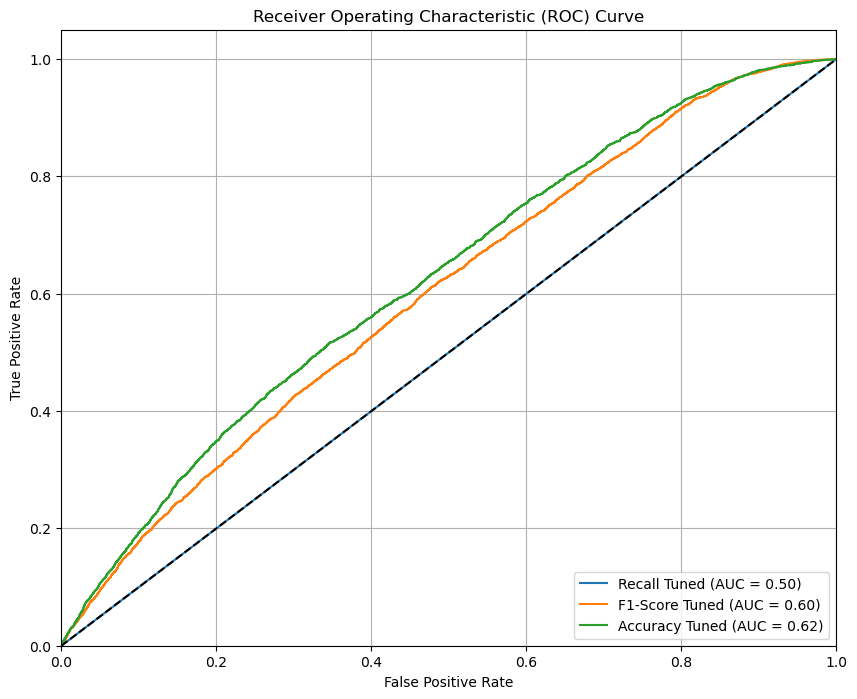

In [32]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, roc_curve


# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(models, model_names, X_val, y_val):
    plt.figure(figsize=(10, 8))

    for model, name in zip(models, model_names):
        # Predict probabilities
        y_val_prob = model.predict_proba(X_val)[:, 1]

        # Compute Precision-Recall curve and average precision
        precision, recall, _ = precision_recall_curve(y_val, y_val_prob)
        average_precision = average_precision_score(y_val, y_val_prob)

        # Plot Precision-Recall curve
        plt.plot(recall, precision, label=f"{name} (AP = {average_precision:.2f})")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

# Function to plot ROC Curve
def plot_roc_curve(models, model_names, X_val, y_val):
    plt.figure(figsize=(10, 8))

    for model, name in zip(models, model_names):
        # Predict probabilities
        y_val_prob = model.predict_proba(X_val)[:, 1]

        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_val, y_val_prob)
        roc_auc = roc_auc_score(y_val, y_val_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Plot Precision-Recall Curve
plot_precision_recall_curve(models, model_names, X_val, y_val)

# Plot ROC Curve
plot_roc_curve(models, model_names, X_val, y_val)

Precision Recall Curve: Because the recall only on the positive class is shown here, it corresponds to the metrics above that the model tuned on recall has the highest (i.e., best) curve here. 

ROC Curve: Because the precision (= true positives / true positives + false positives) is best for the model tuned on accuracy, it makes sense that it has the largest area under the curve (AUC) here.

## Conclusion

For reasons stated in the Comparison of our trained different SVM classifiers, we pick the model tuned on F1 for the final evaluation against the other model classes.